In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# KMeans
from sklearn.cluster import KMeans

## Read + create PCA DF

In [2]:
df = pd.read_pickle('../data/pickled_listings_df')

In [3]:
few_categorical_df = df[['price', 'minimum_nights', 'maximum_nights','review_scores_rating','host_loc_denver', 
                        'needs_license','room_type_Entire home/apt', 'room_type_Private room',
                        'room_type_Shared room', 'current_license', 'list_loc_denver']]

## Create target vals

In [4]:
y_target_vals = df.loc[:,['is_violating']].values


## PCAs

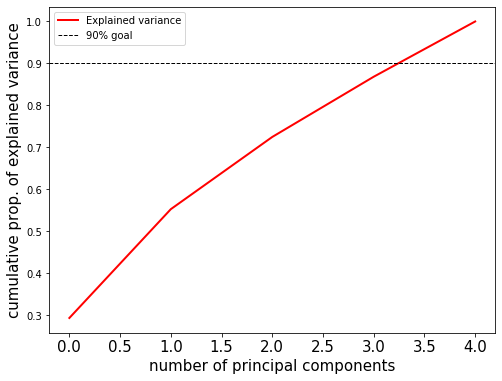

In [49]:
features = ['price', 'minimum_nights', 'maximum_nights','review_scores_rating',
            'host_loc_denver', 'needs_license','room_type_Entire home/apt', 
            'room_type_Private room','room_type_Shared room', 'current_license', 
            'list_loc_denver']

# Separating out the feature
x = few_categorical_df.loc[:, features].values

# Separating out the target
y = df.loc[:,['is_violating']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=5)
few_principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = few_principalComponents
            , columns = ['principal component 1', 'principal component 2',
                        'principal component 3', 'principal component 4',
                        'principal component 5'])
few_pcaDf = pd.concat([principalDf, df[['is_violating']]], axis = 1)

total_variance = np.sum(pca.explained_variance_)
cum_variance = np.cumsum(pca.explained_variance_)
prop_var_expl = cum_variance/total_variance

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(prop_var_expl, color='red', linewidth=2, label='Explained variance')
ax.axhline(0.9, label='90% goal', linestyle='--', color="black", linewidth=1)
ax.set_ylabel('cumulative prop. of explained variance')
ax.set_xlabel('number of principal components')
plt.xticks(fontsize=15)
ax.legend()
# plt.show()
# plt.savefig('explained-variance.png')

## Plot PCA

In [6]:
def plot_PCA(df, df2, title):
    '''
    Plot PCA visuals.
    
    Parameters
    ----------
    df: pd.DataFrame

    Returns
    ----------
    plt: image 
    '''
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title(f'{title}', fontsize = 20)
    targets = [0,1]
    colors = ['r', 'b']
    for target, color in zip(targets,colors):
        indicesToKeep = df2['is_violating'] == target
        ax.scatter(df.loc[indicesToKeep, 'principal component 1']
                , df.loc[indicesToKeep, 'principal component 2']
                , c = color
                , s = 50)
    ax.legend(targets)
    ax.grid()
    # plt.savefig(f'PCA_{title}.png')
    # plt.show()

In [66]:
# plot_PCA(few_categorical_df, df, 'Fewer Categorical Features')

## Plot KMeans - no centroids

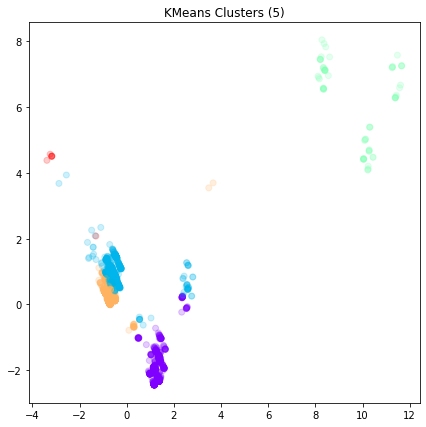

In [67]:
kmeans = KMeans(n_clusters=5)
X_clustered_num = kmeans.fit_predict(few_principalComponents)

# Plot the scatter diagram
plt.figure(figsize = (7,7))
plt.scatter(few_principalComponents[:,0],few_principalComponents[:,1], 
            c=kmeans.labels_,cmap='rainbow', alpha=0.2) 
plt.title('KMeans Clusters (5)')
plt.savefig('kmeans-clusters.png')
# plt.show()

## Plot KMeans - w/ centroids

(array([-4., -2.,  0.,  2.,  4.,  6.,  8., 10.]),
 <a list of 8 Text yticklabel objects>)

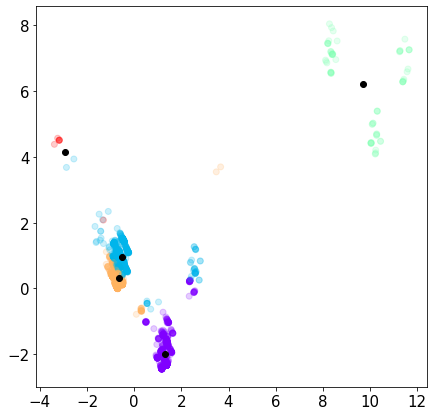

In [69]:
plt.figure(figsize = (7,7))
plt.scatter(few_principalComponents[:,0], few_principalComponents[:,1], c=kmeans.labels_, cmap='rainbow', alpha=0.2)
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.title('KMeans Clusters (3)')
# plt.savefig('kmeans-clusters.png')
# plt.show()

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

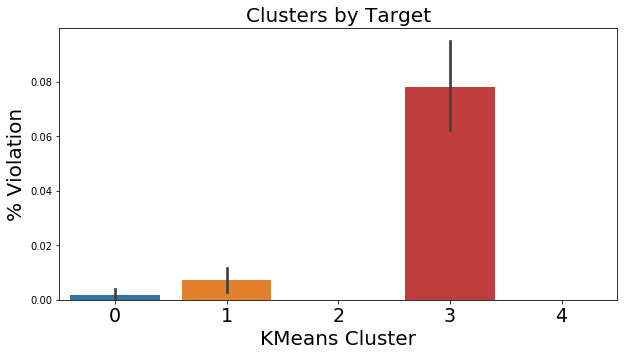

In [65]:
# # Plot cluster by target
plt.figure(figsize=(10,5))
fewkmeans = kmeans.labels_
kmeans_y = y_target_vals
kmeans_y = kmeans_y.reshape(4601)
fewKMeansDF = pd.DataFrame({'kmeans_cluster':fewkmeans, 'target':kmeans_y})
sns.barplot(x='kmeans_cluster',y='target',data=fewKMeansDF)
plt.title('Clusters by Target', fontsize=20)
plt.ylabel('% Violation',fontsize=20)
plt.xlabel('KMeans Cluster',fontsize=20)
plt.xticks(fontsize=19)
# plt.savefig('clusters-by-target.png')
# plt.show()


## Finding the centroids

In [56]:
import sklearn.cluster as cluster

In [57]:
print(kmeans.cluster_centers_)

[[ -0.65538473   0.31458079  -0.55095517   0.46809685   0.11849951]
 [  1.30565229  -2.00491112   0.38149565  -0.17370454   0.15956853]
 [  9.7164231    6.21369999  -1.57164151   0.52900337   0.79417626]
 [ -0.49911818   0.96311013   0.88557415  -0.80729052  -0.57249881]
 [ -2.95065954   4.15156273   3.82678104 -10.88495495  15.19454116]]


## kmeans finding data points nearest to centroids

In [58]:
from sklearn.metrics import pairwise_distances_argmin_min

In [59]:
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, few_principalComponents)
closest


array([1192, 4282, 4452,  484, 2739])

In [30]:
df.loc[4452]


id                                                                                       38357135
listing_url                                                 https://www.airbnb.com/rooms/38357135
summary                                         This recently renovated space was designed wit...
space                                           Whether your stay is just for a night or for a...
description                                     This recently renovated space was designed wit...
notes                                           Several days prior to check-in I will send you...
access                                          Guests will have access to all the spaces port...
interaction                                     We will be available and at your service from ...
house_rules                                     Please remember that you’re staying in a house...
host_id                                                                                   9834932
host_url            

In [31]:
df.loc[4149]

id                                                                                       36693802
listing_url                                                 https://www.airbnb.com/rooms/36693802
summary                                         My place is in Congress park, very safe neighb...
space                                           You’ll love my place because of the comfy bed,...
description                                     My place is in Congress park, very safe neighb...
notes                                           You can drop off of your luggage early if need...
access                                          You have access to front porch (smoking allowe...
interaction                                     Please message me on AirBnB if you need confir...
house_rules                                     House Rules: \t1. You have installed the AirBn...
host_id                                                                                  25229782
host_url            

In [61]:
df.loc[484]

id                                                                                        8482535
listing_url                                                  https://www.airbnb.com/rooms/8482535
summary                                         This is a beautiful newly renovated home in th...
space                                                                                        none
description                                     This is a beautiful newly renovated home in th...
notes                                                                                        none
access                                                                                       none
interaction                                                                                  none
house_rules                                                                                  none
host_id                                                                                   2822362
host_url            